<a href="https://colab.research.google.com/github/jigarcian/Developing-Data-Products/blob/master/analisis_discursos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importando librerias

In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import string



### Definiendo stopwords

In [0]:
spanish_stopwords = stopwords.words('spanish')

### Leyendo discursos

In [0]:
def leer_discurso(discurso):
    f = open(discurso, "r") # abrir archivo
    texto = f.read().lower()
    f.close()
    return texto

In [0]:
nov_6 = leer_discurso('6-nov.txt')
nov_12 = leer_discurso('12-nov.txt')
nov_17 = leer_discurso('17-nov.txt')
oct_19 = leer_discurso('19-oct.txt')
oct_24 = leer_discurso('24-oct.txt')
oct_25 = leer_discurso('25-oct.txt')
oct_28 = leer_discurso('28-oct.txt')
oct_30 = leer_discurso('30-oct.txt')
oct_31 = leer_discurso('31-oct.txt')

In [0]:
discursos = [nov_6, nov_12, nov_17, oct_19, oct_24, oct_25, oct_28, oct_30, oct_31]

In [0]:
nov_6[0:500]

'muy buenos días:\n \nel 22 de octubre, escuchando y acogiendo la voz de la gente, propusimos al país acelerar e intensificar nuestro compromiso social y planteamos una agenda social.\n \nquiero ser muy claro: es una agenda muy vasta porque cubre muchas materias y todas ellas muy sensibles y muy demandadas por los chilenos, y también muy profunda porque beneficia a más de 15 millones de chilenos.\n \ndentro de esa agenda están las prioridades y las preocupaciones que la gente siempre ha manifestado, co'

### Calculando BoW por documento y armando matriz para calculo de distancia coseno
### Sin Stop-words

In [0]:
count_vectorizer = CountVectorizer()
sparse_matrix = count_vectorizer.fit_transform(discursos)

doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(doc_term_matrix, 
                  columns=count_vectorizer.get_feature_names(), 
                  index=['nov_6', 'nov_12', 'nov_17', 'oct_19', 'oct_24', 'oct_25', 'oct_28', 'oct_30', 'oct_31'])

In [0]:
df

,11,13,15,190,20,2000,2005,2006,2010,2011,...,ésta,éstas,éste,éxito,íntimamente,órgano,última,últimas,últimos,útil
nov_6,0,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
nov_12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
nov_17,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,2,3,0,0
oct_19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,1
oct_24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
oct_25,0,0,0,0,2,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
oct_28,3,0,0,0,0,1,1,2,1,1,...,0,1,0,0,0,0,0,1,0,0
oct_30,0,0,0,0,0,0,0,0,0,0,...,1,0,3,0,0,0,0,1,0,0
oct_31,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
from sklearn.metrics.pairwise import cosine_similarity
matriz_similar = cosine_similarity(df, df)

In [0]:
matriz_similar

array([[1.        , 0.73380661, 0.81061663, 0.81798493, 0.82220718,
        0.82633479, 0.83928276, 0.78997029, 0.7697422 ],
       [0.73380661, 1.        , 0.90677996, 0.79358042, 0.76543347,
        0.84993508, 0.82759311, 0.82523302, 0.78435776],
       [0.81061663, 0.90677996, 1.        , 0.87444426, 0.86277703,
        0.90800673, 0.9175162 , 0.88028834, 0.84847735],
       [0.81798493, 0.79358042, 0.87444426, 1.        , 0.87664685,
        0.87864125, 0.90607215, 0.83159802, 0.81870309],
       [0.82220718, 0.76543347, 0.86277703, 0.87664685, 1.        ,
        0.85760318, 0.90673164, 0.83614239, 0.82512379],
       [0.82633479, 0.84993508, 0.90800673, 0.87864125, 0.85760318,
        1.        , 0.8919006 , 0.85110145, 0.82057442],
       [0.83928276, 0.82759311, 0.9175162 , 0.90607215, 0.90673164,
        0.8919006 , 1.        , 0.86594147, 0.83893815],
       [0.78997029, 0.82523302, 0.88028834, 0.83159802, 0.83614239,
        0.85110145, 0.86594147, 1.        , 0.82961   ],


Text(0.5, 1, 'Distancia Coseno SIN stopwords')

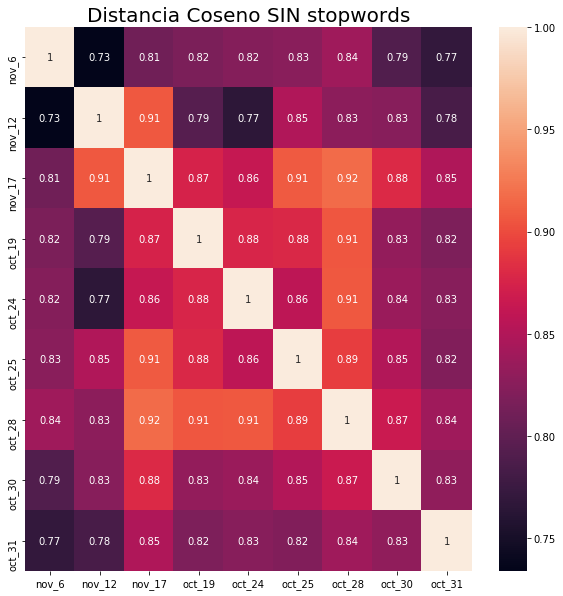

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
index=['nov_6', 'nov_12', 'nov_17', 'oct_19', 'oct_24', 'oct_25', 'oct_28', 'oct_30', 'oct_31']
plt.figure(figsize = (10,10))
ax = sns.heatmap(matriz_similar,annot=True)
ax.set(xticklabels=index)
ax.set(yticklabels=index)
plt.title('Distancia Coseno SIN stopwords', fontsize=20)

### Calculando BoW por documento y armando matriz para calculo de distancia coseno
### Con Stop-words

In [0]:
count_vectorizer = CountVectorizer(stop_words=spanish_stopwords)
sparse_matrix = count_vectorizer.fit_transform(discursos)

doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(doc_term_matrix, 
                  columns=count_vectorizer.get_feature_names(), 
                  index=['nov_6', 'nov_12', 'nov_17', 'oct_19', 'oct_24', 'oct_25', 'oct_28', 'oct_30', 'oct_31'])

In [0]:
matriz_similar = cosine_similarity(df, df)

Text(0.5, 1, 'Distancia Coseno CON stopwords')

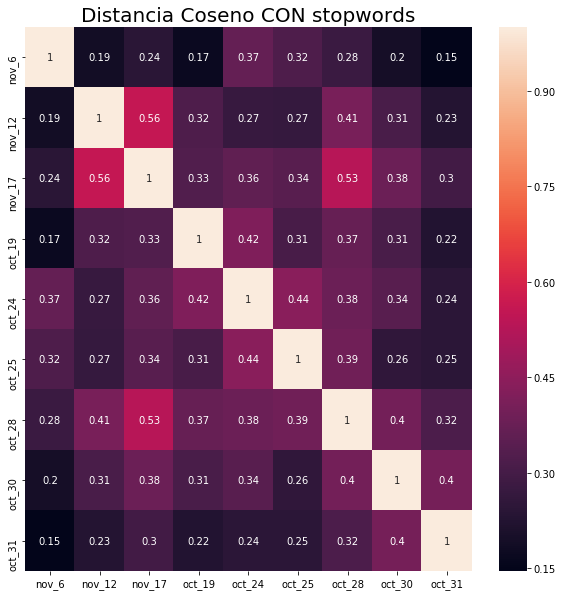

In [0]:
index=['nov_6', 'nov_12', 'nov_17', 'oct_19', 'oct_24', 'oct_25', 'oct_28', 'oct_30', 'oct_31']
plt.figure(figsize = (10,10))
ax = sns.heatmap(matriz_similar,annot=True)
ax.set(xticklabels=index)
ax.set(yticklabels=index)
plt.title('Distancia Coseno CON stopwords', fontsize=20)